# Analysis of Multivariate Data


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from numpy.linalg import lstsq
from urllib.request import urlopen
import statsmodels.api as sm

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Regression Line

In [2]:
# Get the data
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
inFile = 'altman_11_6.txt'
url = url_base + inFile
data = np.genfromtxt(urlopen(url), delimiter=',')

# Solve Equations "By Hand" 

(array([ 1.098,  0.022]), array([ 0.986]), 2, array([ 54.079,   1.838]))


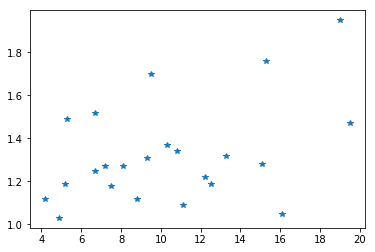

In [3]:
# First I have to delete rows containing "nan"
a,b = np.where(np.isnan(data))
data = np.delete(data, a, axis=0)

x,y = data[:,0], data[:,1]
plt.plot(x,y,'*')

# Create the design matrix
Xmat = sm.add_constant(x)

# Calculate the parameters
params = lstsq(Xmat, y)
np.set_printoptions(precision=3)
print(params)

# Then Solve them with Pandas and Statsmodels

In [5]:
import statsmodels.formula.api as smf

# Convert them into a pandas DataFrame
df = pd.DataFrame(data, columns=['glucose', 'Vcf'])

model_fit = smf.ols('Vcf~glucose', df).fit()

print(model_fit.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.134   
Dependent Variable: Vcf              AIC:                -3.1672 
Date:               2018-05-20 02:03 BIC:                -0.8962 
No. Observations:   23               Log-Likelihood:     3.5836  
Df Model:           1                F-statistic:        4.414   
Df Residuals:       21               Prob (F-statistic): 0.0479  
R-squared:          0.174            Scale:              0.046957
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     1.0978     0.1175   9.3446   0.0000   0.8535   1.3421
glucose       0.0220     0.0105   2.1010   0.0479   0.0002   0.0437
-----------------------------------------------------------------
Omnibus:              1.717        Durbin-Watson:           1.802
Prob(Omnibus):   

# Correlation

In [6]:
# Get the data
inFile = 'altman_11_1.txt'
url = url_base + inFile
data = np.genfromtxt(urlopen(url), delimiter=',')

x = data[:,0]
y = data[:,1]

In [7]:
# Calculate correlations
corr = {}
corr['pearson'], _ = stats.pearsonr(x,y)
corr['spearman'], _ = stats.spearmanr(x,y)
corr['kendall'], _ = stats.kendalltau(x,y)

print(corr) 

{'pearson': 0.79208623217849128, 'spearman': 0.75387958553761558, 'kendall': 0.57620948508912284}


In [8]:
# Show that Spearman's rho is just the Pearson's R of the rank-ordered data
r_rankordered = stats.pearsonr(stats.rankdata(x), stats.rankdata(y))[0]
print("Spearman's rho = {0:5.3f}, and Pearson's r (rankordered) = {1:5.3f}".format(corr['spearman'], r_rankordered))

Spearman's rho = 0.754, and Pearson's r (rankordered) = 0.754
